In [1]:
import json, glob, os, numpy
from data_process_functions import *
from sklearn.ensemble import ExtraTreesClassifier 
os.chdir('/Users/adamyedidia/breast_cancer/spreadsheets/')
import openpyxl, pprint


SHEET_NAME = 'nice_sheet_aug_1.xlsx'
#LIST_OF_BINARY_COLS = ['Q', 'R', 'S', 'T','U','V','W','X','Y','Z','AA','AB','AC']
LIST_OF_BINARY_COLS = ['M', 'N', 'O', 'P', 'Q', 'R','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AF',]
LIST_OF_REAL_COLS = ['A','C','D', 'E', 'F', 'G','H','I', 'J']  
ANSWER_COL = 'AM'
        
with open('image-features-InceptionV3-CC.json') as data_file:
     image_features_map = json.load(data_file)
        
data,feature_names,result=dataprocessWithImage(SHEET_NAME,LIST_OF_BINARY_COLS,LIST_OF_REAL_COLS,ANSWER_COL,image_features_map)
yy=[1 if x=='M' else 0 for x in result]
print 'cancers numbers: %d' %yy.count(1)
y=np.array(yy)
print 'num data points:', len(yy)
X_structure=data[:,1:]
feature_names_structure=feature_names[1:]
n=X_structure.shape[0]





Real-valued Features:
ID
AGE
RACE
Suspicious value W   found on row 2 of column RACE.
Value ignored.
Suspicious value W   found on row 12 of column RACE.
Value ignored.
Suspicious value W   found on row 13 of column RACE.
Value ignored.
Suspicious value W   found on row 25 of column RACE.
Value ignored.
Suspicious value W   found on row 28 of column RACE.
Value ignored.
Suspicious value W   found on row 29 of column RACE.
Value ignored.
Suspicious value W   found on row 41 of column RACE.
Value ignored.
Suspicious value W   found on row 47 of column RACE.
Value ignored.
Suspicious value W   found on row 83 of column RACE.
Value ignored.
Suspicious value W   found on row 84 of column RACE.
Value ignored.
Suspicious value BLA found on row 95 of column RACE.
Value ignored.
Suspicious value BLA found on row 96 of column RACE.
Value ignored.
Suspicious value W   found on row 118 of column RACE.
Value ignored.
Suspicious value W   found on row 145 of column RACE.
Value ignored.
Suspicious va

ZeroDivisionError: float division by zero

In [ ]:
pass

In [ ]:
pass

In [ ]:
f_structure= ExtraTreesClassifier(n_estimators=200,max_depth=12,max_features=80,class_weight = {1:7},
                              random_state=123)
f_report = ExtraTreesClassifier(n_estimators=200,max_depth=10,max_features=500,class_weight = {1:5},
                              random_state=123)
'''
feature_ranking(f_structure,feature_names_structure,X_structure,y,'importantfeature_structure.txt',pp=1)
feature_ranking(f_report,feature_names_report_prune,ft_report_prune,y,'importantfeature_report.txt',pp=1)
'''

In [ ]:
from sklearn.cross_validation import StratifiedShuffleSplit

n_str=100
n_report=180
weight =3
random_state= 127

#sss = StratifiedShuffleSplit(y, 10, test_size=0.05, random_state=1237)
#rs = cross_validation.ShuffleSplit(len(y), n_iter=10,test_size=.1, random_state=1237)

from sklearn.cross_validation import StratifiedKFold
skf = StratifiedKFold(y, 10, shuffle=True, random_state=random_state)

k=0

YTEST=[]
YTEST_index=[]
Probability=[]

for train_index, test_index in skf: 
        ff = ExtraTreesClassifier(n_estimators=200,max_depth=10,max_features=100
                                      ,class_weight = {1:weight},random_state=123)
        
        print 'new sets'
        X_train_struct, X_test_struct = X_structure[train_index], X_structure[test_index]
        #X_train_txt, X_test_txt = ft_report_prune[train_index], ft_report_prune[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        YTEST.append(y_test)
        YTEST_index.append(test_index)
   
        #k+=1
        #feature_ranking(f_structure,feature_names_structure,X_train_struct,y_train,'importantfeature_strcture_'+str(k)+'.txt',pp=0)
        #feature_ranking(f_report,feature_names_report_prune,X_train_txt,y_train,'importantfeature_report_'+str(k)+'.txt',pp=0)

        indx_structure=get_sorted_ft_idx(f_structure,X_train_struct,y_train,n=n_str)
        #indx_txt=get_sorted_ft_idx(f_report,X_train_txt,y_train,n=n_report)
        
        #X_train=np.concatenate((X_train_struct[:,indx_structure], X_train_txt[:,indx_txt]), axis=1)
        #X_test=np.concatenate((X_test_struct[:,indx_structure], X_test_txt[:,indx_txt]), axis=1)
        X_train = X_train_struct
        X_test = X_test_struct
        
       
        ff.fit(X_train, y_train)

        ff_proba=ff.predict_proba(X_test)
        Probability.append(ff_proba)
        indx1=np.where(y_test==1)
        indx2=np.where(y_test==0)
        yy= np.random.random_sample((len(y_test),))
        plt.clf()
        #plt.scatter([0, 1], [0, 1])
        plt.scatter(ff_proba[:,1][indx1], yy[indx1], c=y_test[indx1], s=50,marker='o')
        plt.scatter(ff_proba[:,1][indx2], yy[indx2], c=y_test[indx2], s=50,marker='+',label='no')
        plt.xlabel('probability')
        plt.ylabel('Random number')
        plt.legend(loc='best')
        plt.show()
        #prb=cus_probability(threshold, ff_proba[:,1])
        #prb=np.array(prb)

In [ ]:
p_all=[]
f_all=[]
r_all=[]
roc_all=[]
patients=[]
for ii in range(len(YTEST)):
    y_test=YTEST[ii]
    ff_proba=Probability[ii]
    roc=[]
    p=[]
    r=[]
    f=[]
    #results=[]
    pat=[]
    Thresh=[]
    for i in range(30):
        threshold=float(float(i+1)/80)
        Thresh.append(threshold)
        predicted=cus_predict(threshold, ff_proba[:,1])
        #results.append(predicted)

        fpr_rf, tpr_rf, _ = roc_curve(y_test,predicted)
        roc.append([fpr_rf, tpr_rf])
        p.append(precision_score(y_test,predicted))
        r.append(recall_score(y_test,predicted))
        f.append(f1_score(y_test,predicted))
        print(classification_report(y_test,predicted) )
        print 'roc_auc is %f :' %roc_auc_score(y_test,predicted)
        pt=len(predicted)-np.count_nonzero(predicted)
        print 'non cancer patient : %d' %pt
        pat.append(pt)

    #plt.scatter(prb[:,1],y_test)

    '''
    indxFb=np.intersect1d(np.where(ff_proba[:,1]>0.7 ),np.where(y_test==0))
    indxFm=np.intersect1d(np.where(ff_proba[:,1]<0.3),np.where(y_test==1))
    fp= X_test[indxFm][:,0]  ### The first column is the patient ID
    fn=X_test[indxFb][:,0]
    falsepositive.extend(fp)
    falsenegative.extend(fn)
    '''
    p_all.append(p)
    r_all.append(r)
    f_all.append(f)
    roc_all.append(roc)
    patients.append(pat)

In [84]:
n=2
#m=f_all.shape[1]
m=10

f_all=np.array(f_all)
r_all=np.array(r_all)
patients=np.array(patients)
print 'trainging size: %d' %f_all[:-n,i].shape
for i in range(m):
    print average(f_all[:-n,i])
print "  \n test result"
for i in range(m):
    print average(f_all[-n:,i])
print " \n train result"
for i in range(m):
    print average(r_all[:-n,i])
print "  \ntest result"

for i in range(m):
    print average(r_all[-n:,i])

print "\n train result"
t=sum([len(l) for l in YTEST_index[:-n] ])
for i in range(m):
    print float(sum(patients[:-n,i])/float(sum([len(l) for l in YTEST_index[:-n] ])))

print ' \n test result'
for i in range(m):
    print float(sum(patients[-n:,i])/float(sum([len(l) for l in YTEST_index[-n:] ])))
    
patients[9,3]

trainging size: 8
0.239362509963
0.248916679186
0.268146963709
0.291208364449
0.322062600434
0.346616941295
0.355921374459
0.370199535566
0.389706781844
0.383767094974
  
 test result
0.250319284802
0.259615384615
0.272173913043
0.277173913043
0.260351673284
0.281771501926
0.303474903475
0.333333333333
0.354838709677
0.381481481481
 
 train result
0.966517857143
0.930803571429
0.930803571429
0.912946428571
0.912946428571
0.897321428571
0.866071428571
0.832589285714
0.814732142857
0.732142857143
  
test result
1.0
1.0
0.928571428571
0.928571428571
0.785714285714
0.785714285714
0.785714285714
0.785714285714
0.785714285714
0.785714285714

 train result
0.203738317757
0.269158878505
0.330841121495
0.405607476636
0.471028037383
0.52523364486
0.560747663551
0.6
0.629906542056
0.671028037383
 
 test result
0.257575757576
0.287878787879
0.378787878788
0.393939393939
0.469696969697
0.507575757576
0.560606060606
0.606060606061
0.636363636364
0.674242424242


27

In [71]:
#[54486, 86819,111803]
TestID=54486
newdata=[]
newtxt=[]
ID=[]
newy=[]
for i in range(data.shape[0]):
    if data[i,0] ==TestID:
        ID.append(data[i,0])
        newdata.append(data[i,1:])
        newtxt.append(ft_report_p[i,:])
        newy.append(y[i])
    '''
    else:
        if yy[i]==1:
            ID.append(data[i,0])
            newdata.append(data[i])
            newtxt.append(ft_report_p[i,:])
            newy.append(yy[i])
    '''
newdata=np.array(newdata)
newtxt=np.array(newtxt)
newy=np.array(newy)

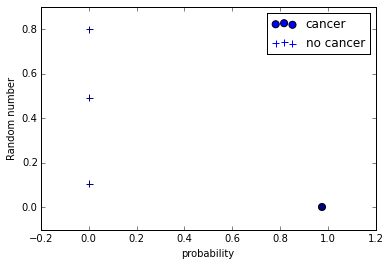

In [87]:
X_test_special=np.concatenate((newdata[:,indx_structure], newtxt[:,indx_txt]), axis=1)
ff_proba=ff.predict_proba(X_test_special)
Probability.append(ff_proba)
indx1=np.where(newy==1)
indx2=np.where(newy==0)
yy= np.random.random_sample((len(newy),))
plt.clf()
#plt.scatter([0, 1], [0, 1])
plt.scatter(ff_proba[:,1][indx1], yy[indx1], c=newy[indx1], s=50,marker='o',label='cancer')
plt.scatter(ff_proba[:,1][indx2], yy[indx2], c=newy[indx2], s=50,marker='+',label='no cancer')
plt.xlabel('probability')
plt.ylabel('Random number')
plt.legend(loc='best')
plt.show()
#prb=cus_probability(threshold, ff_proba[:,1])
#prb=np.array(prb)

In [52]:
print str(X_test.shape)
print len( indx_structure)
print len( indx_txt)

(66L, 280L)
100
180
